# KIAM 8

## Task 1 - Data Analysis and Preprocessing

### Feature Engineering

-	Transaction frequency and velocity: number of transactions per user in time windows.
-	Time-based features: 
    1.	hour_of_day, 
    2.	day_of_week
-	time_since_signup: duration between signup_time and purchase_time


In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# Load the Cleaned Fraud Data from the EDA step
df_cleaned = pd.read_csv('../data/processed/Fraud_Data_Enriched.csv')

In [3]:
#Examine the DataFrame
df_cleaned.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [4]:
# Add Scripts Folder to the System Path
import sys
import os

cwd = os.getcwd()
scripts_path=os.path.join(cwd, '..','scripts')
scripts_abs_path=os.path.abspath(scripts_path)

if scripts_abs_path not in sys.path and os.path.isdir(scripts_abs_path):
    sys.path.insert(0, scripts_abs_path)
    print('Added Scripts Path to System Path:')
else:
    print('Scripts Path already in System Path or does not exist:')

Added Scripts Path to System Path:


In [5]:
# Import pre-Loaded Functions
from Feature_engineering import engineer_all_features as ef

In [6]:
engineered_df = ef(df_cleaned)


FEATURE ENGINEERING PIPELINE
Creating time-based features...
✓ Created time features: hour_of_day, day_of_week, time_since_signup, etc.
Creating user transaction features...
✓ Created user transaction features
Creating velocity features...
✓ Created velocity features
Creating amount-based features...
✓ Created amount-based features

FEATURE ENGINEERING SUMMARY
Total features: 34
Original shape: (151112, 34)

New features created (23):
  - Country
  - hour_of_day
  - day_of_week
  - day_of_month
  - month
  - is_weekend
  - time_of_day
  - time_since_signup
  - quick_purchase
  - user_txn_count
  - user_total_value
  - user_avg_purchase
  - single_transaction_user
  - device_user_count
  - shared_device
  - time_diff_hours
  - txn_last_24h
  - high_velocity
  - purchase_category
  - log_purchase_value
  - deviation_from_avg
  - deviation_ratio
  - is_round_amount


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\scripts\Feature_engineering.py:126: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['txn_last_24h'] = df.groupby('user_id', group_keys=False).apply(


In [7]:
# Examine the Engineered DataFrame
engineered_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,device_user_count,shared_device,time_diff_hours,txn_last_24h,high_velocity,purchase_category,log_purchase_value,deviation_from_avg,deviation_ratio,is_round_amount
116708,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,8.802175e+08,...,1,0,NaN,0,0,medium,4.007333,0.0,0.981818,0
15108,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,F,38,2.785906e+09,...,1,0,NaN,0,0,low,3.737670,0.0,0.976190,0
46047,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,3.560567e+08,...,1,0,NaN,0,0,low,3.871201,0.0,0.979167,0
67650,9,2015-05-16 15:58:32,2015-05-20 23:06:42,62,IEZOHXPZBIRTE,SEO,FireFox,M,21,7.591047e+08,...,1,0,NaN,0,0,medium,4.143135,0.0,0.984127,0
109067,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,M,19,2.985180e+09,...,1,0,NaN,0,0,low,3.583519,0.0,0.972222,0


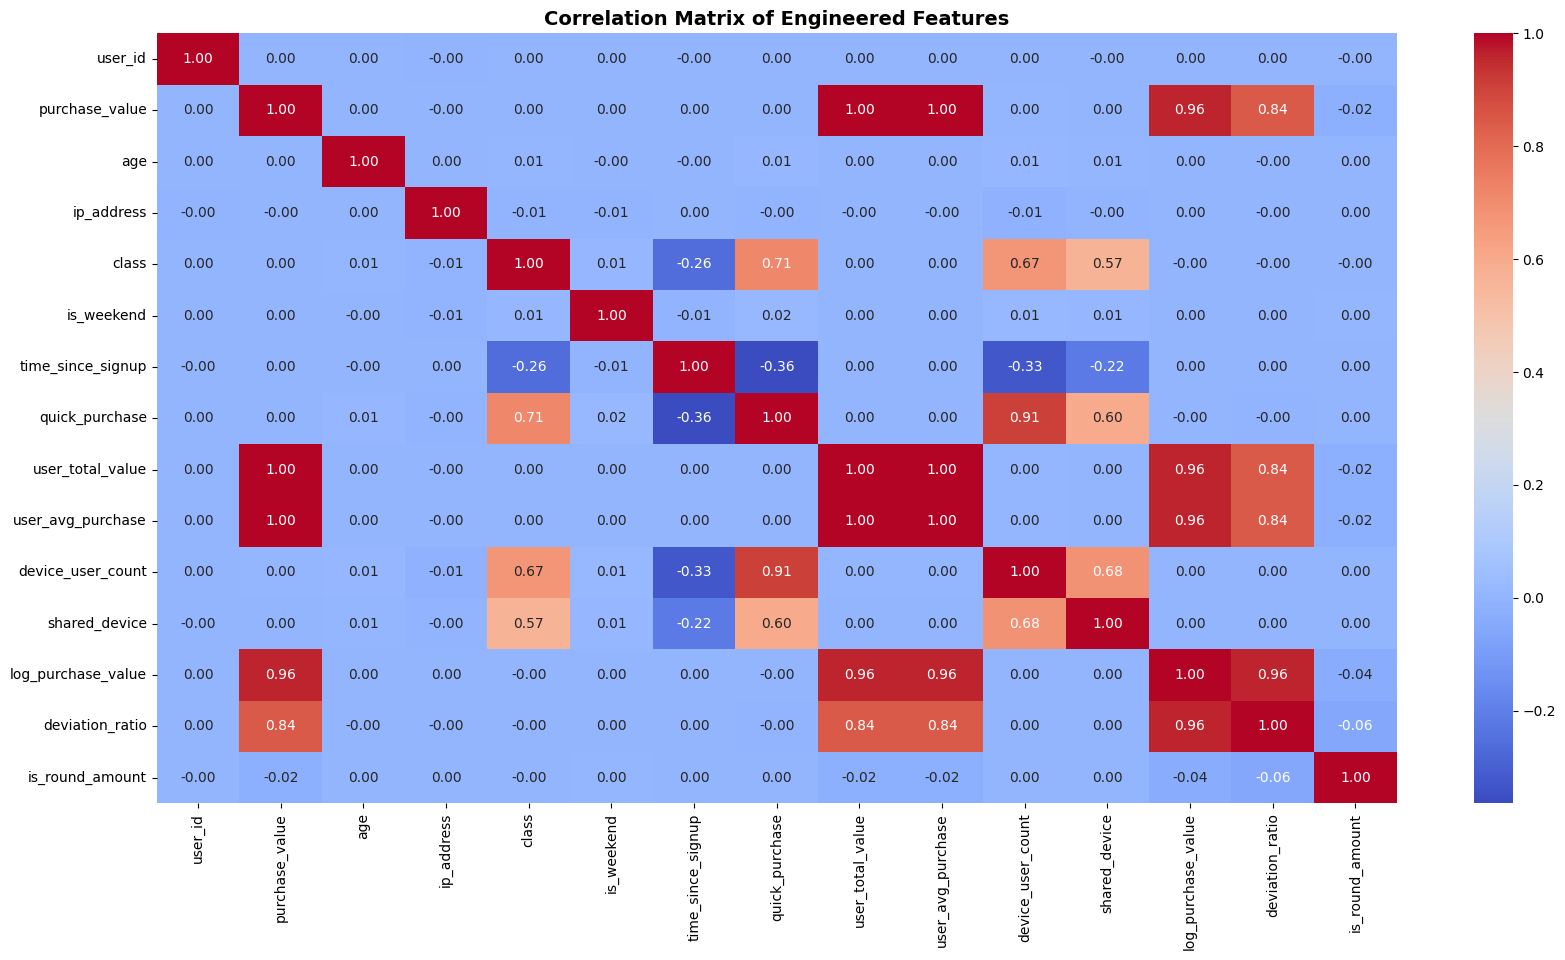

In [23]:
# Visualizae Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

Corr_cols = [col for col in engineered_df.columns if engineered_df[col].dtype in ['int64', 'float64']]
exclude_cols = ['user_txn_count','single_transaction_user','time_diff_hours','txn_last_24h','high_velocity','deviation_from_avg']
Corr_cols = [col for col in Corr_cols if col not in exclude_cols]
corelation_mat =engineered_df[Corr_cols].corr()

plt.figure(figsize=(20,10))
sns.heatmap(corelation_mat, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Engineered Features', fontsize=14, fontweight='bold') 
plt.savefig('figures/Correlation Matrix of Engineered Features.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Data Transfomation 
import data_processing as dp

In [8]:
# Feature Preparation

X, y, feature_names, encoders = dp.prepare_features(engineered_df, target_col='class')


FEATURE PREPARATION
Initial features: 28
Categorical features: 6
Numerical features: 22

Encoding categorical features: ['source', 'browser', 'sex', 'Country', 'time_of_day', 'purchase_category']

Final feature matrix shape: (151112, 216)
Target distribution:
0    136961
1     14151
Name: count, dtype: int64


In [9]:
# train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Scale Features 

X_train_scaled, X_test_scaled, scaler = dp.scale_features(X_train, X_test)


FEATURE SCALING & IMPUTATION


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [15]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [15]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


✓ Missing values imputed using median
✓ Features scaled using StandardScaler
Mean of scaled training data: 0.000000
Std of scaled training data: 0.978846


In [ ]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set fraud rate: {sum(y_train == 1) / len(y_train) * 100:.2f}%")
print(f"Test set fraud rate: {sum(y_test == 1) / len(y_test) * 100:.2f}%")

Training set size: 120889
Test set size: 30223
Training set fraud rate: 9.36%
Test set fraud rate: 9.36%


In [12]:
# Scale features

X_train_scaled, X_test_scaled, scaler = dp.scale_features(X_train, X_test)


FEATURE SCALING & IMPUTATION


c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [15]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Improved-Fraud_Detection\.venv\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [15]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


✓ Missing values imputed using median
✓ Features scaled using StandardScaler
Mean of scaled training data: 0.000000
Std of scaled training data: 0.978846


In [13]:
# Apply SMOTE to handle class imbalance

X_train_resampled, y_train_resampled = dp.handle_imbalance_smote(X_train_scaled, y_train, sampling_strategy=0.5)


HANDLING CLASS IMBALANCE - SMOTE
Original class distribution:
  Class 0 (Legitimate): 109568
  Class 1 (Fraud): 11321
  Ratio: 9.68:1

Resampled class distribution:
  Class 0 (Legitimate): 109568
  Class 1 (Fraud): 54784
  Ratio: 2.00:1


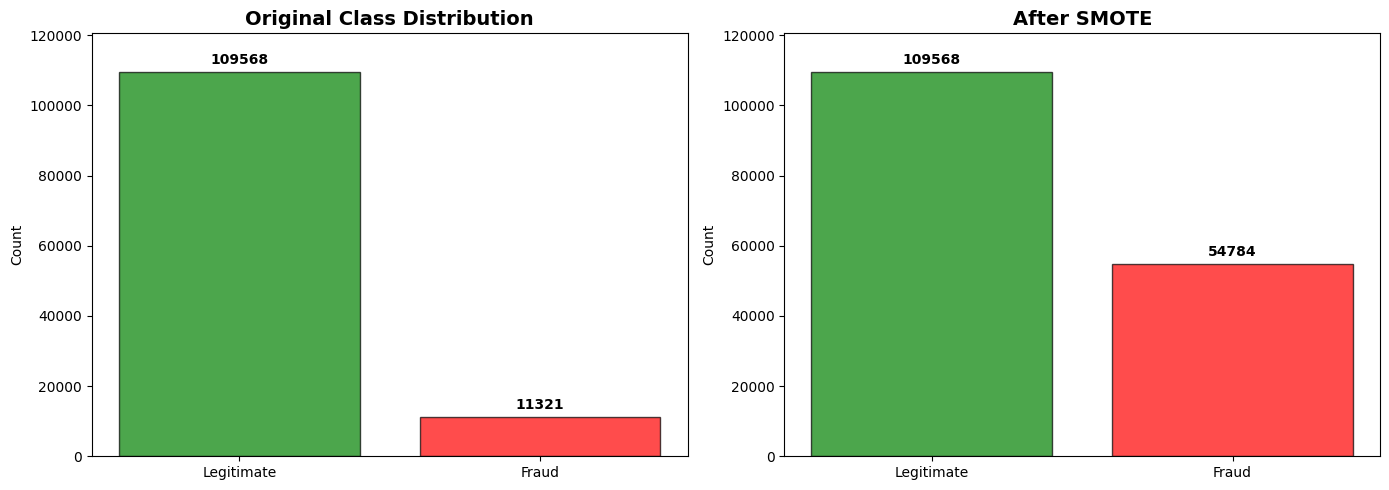

In [14]:
 # Visualize class distribution before and after SMOTE

 dp.visualize_class_distribution(y_train, y_train_resampled, 'SMOTE')

In [17]:
    # Save processed data
    print("\n" + "="*60)
    print("SAVING PROCESSED DATA")
    print("="*60)
    
    np.save('../data/processed/X_train.npy', X_train_scaled)
    np.save('../data/processed/X_test.npy', X_test_scaled)
    np.save('../data/processed/y_train.npy', y_train)
    np.save('../data/processed/y_test.npy', y_test)
    np.save('../data/processed/X_train_resampled.npy', X_train_resampled)
    np.save('../data/processed/y_train_resampled.npy', y_train_resampled)
    
    # Save feature names
    pd.Series(feature_names).to_csv('../data/processed/feature_names.csv', index=False)
    
    print("✓ Saved preprocessed data:")
    print("  - X_train.npy, X_test.npy")
    print("  - y_train.npy, y_test.npy")
    print("  - X_train_resampled.npy, y_train_resampled.npy")
    print("  - feature_names.csv")


SAVING PROCESSED DATA
✓ Saved preprocessed data:
  - X_train.npy, X_test.npy
  - y_train.npy, y_test.npy
  - X_train_resampled.npy, y_train_resampled.npy
  - feature_names.csv
